In [2]:
from pathlib import Path

import sys
PIP_PATH = str(Path(sys.executable).parent / 'pip')
print(PIP_PATH)

/Users/infidelis/Desktop/comptech/stock-news/venv/bin/pip


In [3]:
%%capture 
!$PIP_PATH install pandas envparse pymongo

In [5]:
pwd

'/Users/infidelis/Desktop/comptech/stock-news/data_preprocess'

In [10]:
from envparse import env
import pandas as pd
import pymongo as pym
import ssl

In [11]:
def connect_to_mongodb():
    env.read_envfile()
    url = env("URL")
    ssl_ca_certs = str(Path('../additional/YandexInternalRootCA.crt'))
    con = pym.MongoClient(url,
                           ssl_ca_certs=ssl_ca_certs,
                           ssl_cert_reqs=ssl.CERT_REQUIRED)
    return con.get_database('stock-news-backend')

In [58]:
def concat_mongo_df(gdelt_coll, yfinance_coll):
    df_gdelt = pd.DataFrame.from_dict(gdelt_coll.find({}, {'_id': 0}))
    df_yfinance = pd.DataFrame.from_dict(yfinance_coll.find({}, {'_id': 0}))

    df = df_gdelt.merge(df_yfinance, 
                          'inner', 
                          left_on=['datetime', 'Ticker'],
                          right_on=['Date', 'Ticker'],
                          suffixes=("", "_DROP")
                        ).drop('Date', axis=1)
    res_cols = set(filter(lambda x: not x.endswith('_DROP'), df.columns))
    return df[res_cols]

In [59]:
%%time

db = connect_to_mongodb()
df = concat_mongo_df(db.GDELT, db.YFINANCE)

CPU times: user 3.14 s, sys: 851 ms, total: 3.99 s
Wall time: 1min 10s


In [60]:
df

,Average_Tone_sum,Price Change,Article_Count_min,Percentage Change,Article_Count_std,Volume_Intensity_max,Average_Tone_min,Ticker,Article_Count_sum,Volume_Intensity_min,...,Close,Volume,Article_Count_max,Average_Tone_max,Volume_Intensity_mean,Article_Count_mean,Average_Tone_mean,Low,datetime,High
0,0.0000,-1.550003,0.0,-0.868592,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,178.449997,2466900.0,0.0,0.0000,0.000000,0.000,0.000000,175.630005,2020-01-03,178.660004
1,0.0000,0.169998,0.0,0.095173,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,178.619995,1998000.0,0.0,0.0000,0.000000,0.000,0.000000,176.350006,2020-01-06,178.710007
2,0.0000,-0.720001,0.0,-0.404722,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,177.899994,2173000.0,0.0,0.0000,0.000000,0.000,0.000000,176.820007,2020-01-07,178.509995
3,0.0000,2.730011,0.0,1.511383,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,180.630005,2758300.0,0.0,0.0000,0.000000,0.000,0.000000,177.649994,2020-01-08,181.500000
4,0.0000,0.569992,0.0,0.314565,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,181.199997,2746300.0,0.0,0.0000,0.000000,0.000,0.000000,179.759995,2020-01-09,181.589996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106207,-0.3079,1.469997,0.0,3.378528,731.800519,0.4647,-3.6003,ZION,3284.0,0.0,...,43.509998,706800.0,1842.0,2.4060,0.103575,410.500,-0.038487,42.290001,2020-12-23,43.700001
106208,0.9359,-0.169998,0.0,-0.392243,576.629105,0.5010,-1.8541,ZION,2293.0,0.0,...,43.340000,327700.0,1654.0,2.5102,0.086813,286.625,0.116987,42.660000,2020-12-24,43.619999
106209,5.1790,0.020000,0.0,0.046127,505.683113,0.4283,-2.2652,ZION,2101.0,0.0,...,43.360001,835600.0,1454.0,4.4747,0.077375,262.625,0.647375,43.259998,2020-12-28,44.139999
106210,-0.6395,-0.590000,0.0,-1.379472,907.006684,0.7082,-2.5691,ZION,3285.0,0.0,...,42.770000,1084100.0,2613.0,1.4509,0.111300,410.625,-0.079937,42.619999,2020-12-29,43.389999


In [61]:
len(df.Ticker.unique())

424

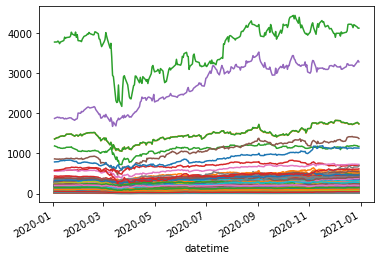

In [63]:
df.index = df['datetime']

for company in df.Ticker.unique():
    df[df.Ticker == company]['Adj Close'].plot()

In [65]:
df

,Average_Tone_sum,Price Change,Article_Count_min,Percentage Change,Article_Count_std,Volume_Intensity_max,Average_Tone_min,Ticker,Article_Count_sum,Volume_Intensity_min,...,Close,Volume,Article_Count_max,Average_Tone_max,Volume_Intensity_mean,Article_Count_mean,Average_Tone_mean,Low,datetime,High
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0000,-1.550003,0.0,-0.868592,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,178.449997,2466900.0,0.0,0.0000,0.000000,0.000,0.000000,175.630005,2020-01-03,178.660004
2020-01-06,0.0000,0.169998,0.0,0.095173,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,178.619995,1998000.0,0.0,0.0000,0.000000,0.000,0.000000,176.350006,2020-01-06,178.710007
2020-01-07,0.0000,-0.720001,0.0,-0.404722,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,177.899994,2173000.0,0.0,0.0000,0.000000,0.000,0.000000,176.820007,2020-01-07,178.509995
2020-01-08,0.0000,2.730011,0.0,1.511383,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,180.630005,2758300.0,0.0,0.0000,0.000000,0.000,0.000000,177.649994,2020-01-08,181.500000
2020-01-09,0.0000,0.569992,0.0,0.314565,0.000000,0.0000,0.0000,MMM,0.0,0.0,...,181.199997,2746300.0,0.0,0.0000,0.000000,0.000,0.000000,179.759995,2020-01-09,181.589996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.3079,1.469997,0.0,3.378528,731.800519,0.4647,-3.6003,ZION,3284.0,0.0,...,43.509998,706800.0,1842.0,2.4060,0.103575,410.500,-0.038487,42.290001,2020-12-23,43.700001
2020-12-24,0.9359,-0.169998,0.0,-0.392243,576.629105,0.5010,-1.8541,ZION,2293.0,0.0,...,43.340000,327700.0,1654.0,2.5102,0.086813,286.625,0.116987,42.660000,2020-12-24,43.619999
2020-12-28,5.1790,0.020000,0.0,0.046127,505.683113,0.4283,-2.2652,ZION,2101.0,0.0,...,43.360001,835600.0,1454.0,4.4747,0.077375,262.625,0.647375,43.259998,2020-12-28,44.139999


In [67]:
df.to_csv(f'../data/companies_{len(df.Ticker.unique())}.csv')